<a href="https://colab.research.google.com/github/ChristianaKiervin/MLnow_2.0/blob/main/Univariate%20Linear%20Regression%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Univariate Linear Regression



[Link to Download the dataset]()

**Date Created**: June 6, 2021


**Author**:
Christiana Kiervin


## Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
cd '/content/drive/MyDrive/ML Course/Health'

/content/drive/MyDrive/ML Course/Health


In [34]:
ls

consc_health.csv


In [35]:
import os

In [37]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [38]:
trainData = pd.read_csv('consc_health.csv') #load the train csv file as dataframe

In [39]:
trainData.head(10) #print the first ten rows of the train dataframe

,pid,gender,consc,sr_health
0,1,male,2.659688,1.909508
1,2,male,5.022069,4.493539
2,3,male,3.846887,3.403894
3,4,male,1.734497,2.045359
4,5,male,3.452961,4.210038
5,6,male,4.005985,5.111872
6,7,male,2.817236,3.089556
7,8,male,3.902623,4.575580
8,9,male,3.102556,3.902935
9,10,male,3.039057,2.637214


We are just going to consider self-reportedconscientiousness and self-reported health scores for this univariate linear regression

$health_i = consc_i  \cdot \theta_1 + \theta_0$

In [40]:
uniTrainData = trainData[['consc', 'sr_health']]
uniTrainData.head(5)

,consc,sr_health
0,2.659688,1.909508
1,5.022069,4.493539
2,3.846887,3.403894
3,1.734497,2.045359
4,3.452961,4.210038


In [41]:
uniTrainData.to_csv('univariate_healthData.csv')

In [42]:
ls

consc_health.csv  univariate_healthData.csv


## Data visualization

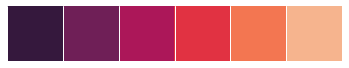

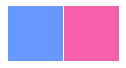

In [43]:
import seaborn as sns
sns.palplot(sns.color_palette('rocket')) #Purple to Orange colors
pal = sns.color_palette('rocket', 6) #print 6 color shades from rocket
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#6698FF', '#F660AB'] #blue and pink hex codes (see: https://www.colorschemer.com/hex-color-codes/#:~:text=HEX%20Color%20Codes%20Chart%20%20%20%20HEX,%20%20Midnight%20%2099%20more%20rows%20)
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [44]:
uniTrainData.columns #columns in the dataframe

Index(['consc', 'sr_health'], dtype='object')

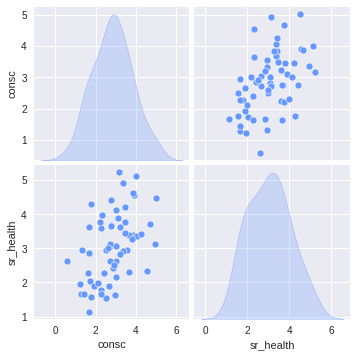

In [45]:
#pairplot for all the values

sns.pairplot(uniTrainData,
             x_vars = ['consc', 'sr_health'],
             y_vars =  ['consc', 'sr_health'],
       diag_kind='kde'
             )

## Data Splits

In [46]:
#80-20 train-test percent split

trainDataset = uniTrainData.sample(frac=0.8, random_state=0) 
testDataset = uniTrainData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

       consc  sr_health
26  2.717430   3.128065
35  1.667966   2.860350
59  2.288752   1.658569
28  2.499324   2.963693
11  3.560962   2.941156
       consc  sr_health
0   2.659688   1.909508
3   1.734497   2.045359
9   3.039057   2.637214
19  3.345485   2.914556
21  2.412827   2.275091


In [47]:
print(trainDataset.shape)
print(testDataset.shape)

(48, 2)
(12, 2)


In [48]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

       consc  sr_health
26  2.717430   3.128065
35  1.667966   2.860350
59  2.288752   1.658569
28  2.499324   2.963693
11  3.560962   2.941156
       consc  sr_health
0   2.659688   1.909508
3   1.734497   2.045359
9   3.039057   2.637214
19  3.345485   2.914556
21  2.412827   2.275091


In [50]:
#removing the SalePrice column and saving it into the labels variable

trainLabels = trainFeatures.pop('sr_health')
testLabels = testFeatures.pop('sr_health')

print(trainLabels.head())
print(testLabels.head())

26    3.128065
35    2.860350
59    1.658569
28    2.963693
11    2.941156
Name: sr_health, dtype: float64
0     1.909508
3     2.045359
9     2.637214
19    2.914556
21    2.275091
Name: sr_health, dtype: float64


In [51]:
print(trainFeatures.head())
print(testFeatures.head())

       consc
26  2.717430
35  1.667966
59  2.288752
28  2.499324
11  3.560962
       consc
0   2.659688
3   1.734497
9   3.039057
19  3.345485
21  2.412827


In [95]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [98]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    #optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    optimizer = 'adam', #use this line if you wanted to just take the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [99]:
numEpochs = 500
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Epoch 1/500
2/2 [==============================] - 0s 136ms/step - loss: 2.1999 - mae: 2.1999 - mse: 5.8296 - val_loss: 1.4848 - val_mae: 1.4848 - val_mse: 2.7509
Epoch 2/500
2/2 [==============================] - 0s 22ms/step - loss: 2.1921 - mae: 2.1921 - mse: 5.7938 - val_loss: 1.4779 - val_mae: 1.4779 - val_mse: 2.7302
Epoch 3/500
2/2 [==============================] - 0s 22ms/step - loss: 2.1842 - mae: 2.1842 - mse: 5.7579 - val_loss: 1.4711 - val_mae: 1.4711 - val_mse: 2.7096
Epoch 4/500
2/2 [==============================] - 0s 23ms/step - loss: 2.1763 - mae: 2.1763 - mse: 5.7214 - val_loss: 1.4642 - val_mae: 1.4642 - val_mse: 2.6892
Epoch 5/500
2/2 [==============================] - 0s 21ms/step - loss: 2.1684 - mae: 2.1684 - mse: 5.6849 - val_loss: 1.4574 - val_mae: 1.4574 - val_mse: 2.6688
Epoch 6/500
2/2 [==============================] - 0s 22ms/step - loss: 2.1605 - mae: 2.1605 - mse: 5.6490 - val_loss: 1.4506 - val_mae: 1.4506 - val_mse: 2.6486
Epoch 7/500
2/2 [==========

In [100]:
print(history)

In [101]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


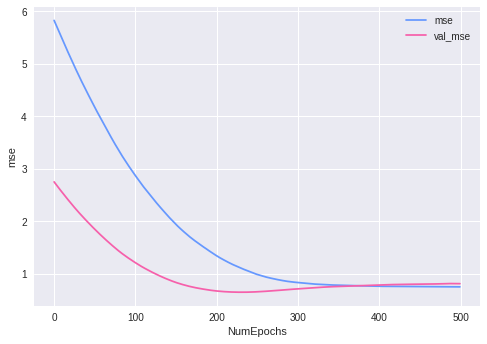

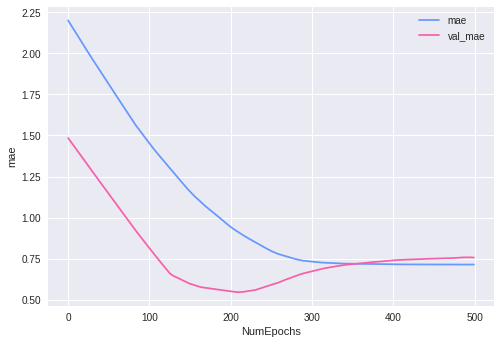

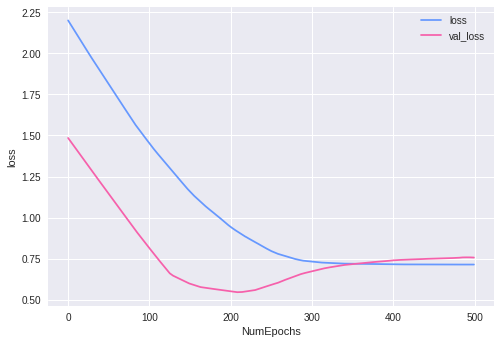

In [102]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [103]:
model.predict([1])

array([[2.0353265]], dtype=float32)

In [105]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[2.0353265]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[2.0353265]
 [2.556744 ]
 [3.0781617]
 [3.5995793]
 [4.120997 ]]

List of Predictions (flattened out):
[2.0353265 2.556744  3.0781617 3.5995793 4.120997 ]



In [106]:
print(testFeatures)

       consc
0   2.659688
3   1.734497
9   3.039057
19  3.345485
21  2.412827
23  1.296842
36  2.287142
39  1.768703
44  4.538686
47  1.941976
53  3.479013
55  0.573460


In [107]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [108]:
print(len(testPreds))
print(testPreds)

12
[2.9007173 2.4183064 3.0985265 3.2583036 2.7719994 2.190105  2.7064648
 2.4361415 3.8804593 2.5264893 3.3279274 1.8129212]


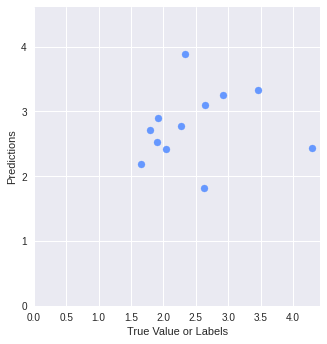

In [109]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

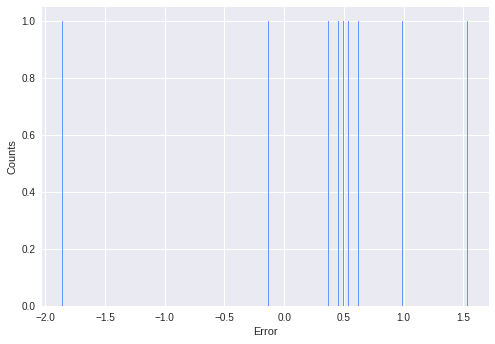

In [110]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

Note: 


Validation loss `val_loss` is a metric that tells you how much deviation from the actual label can you expect in the predicted label

To optimize your predicitons -->

- Hyperparameter tuning --> `numEpochs`, `optimizer`, `learning_rate`, lossFunctions